In [2]:
import os
import numpy as np
import ast

# Define file paths
categories_file = "categories_train.txt"
timestamps_file = "raw_timestamps_train.txt"
output_dir = "processed_tracks"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Read instrument category mappings
categories = {}
with open(categories_file, "r") as f:
    current_track = None
    for line in f:
        line = line.strip()
        if line.startswith("Track:"):
            current_track = line.split("\\")[-1]
            categories[current_track] = {}
        elif ".flac:" in line:
            stem, category = line.split(": ")
            categories[current_track][stem] = int(category)

# Read timestamps
timestamps = {}
with open(timestamps_file, "r") as f:
    current_track = None
    for line in f:
        line = line.strip()
        if line.startswith("Track:"):
            current_track = line.split("\\")[-1]
            timestamps[current_track] = {}
        elif ".flac:" in line:
            stem, time_data = line.split(": ")
            timestamps[current_track][stem] = ast.literal_eval(time_data)  # Convert string to list of tuples

# Process each track
for track in categories.keys():
    if track not in timestamps:
        continue
    
    # Determine max time length in seconds for the track
    max_time = 0
    for stem in timestamps[track].values():
        for start, end in stem:
            max_time = max(max_time, int(end))
    
    # Initialize binary matrix (129 instruments x max_time seconds)
    matrix = np.zeros((129, max_time + 1), dtype=np.uint8)
    
    # Fill the matrix
    for stem, category in categories[track].items():
        if stem in timestamps[track]:
            for start, end in timestamps[track][stem]:
                matrix[category, int(start):int(end) + 1] = 1
    
    # Save matrix as .npy file
    output_path = os.path.join(output_dir, f"{track}.npy")
    np.save(output_path, matrix)
    print(f"Processed {track} -> {output_path}")

print("Processing complete.")

Processed Track00001 -> processed_tracks\Track00001.npy
Processed Track00002 -> processed_tracks\Track00002.npy
Processed Track00003 -> processed_tracks\Track00003.npy
Processed Track00004 -> processed_tracks\Track00004.npy
Processed Track00005 -> processed_tracks\Track00005.npy
Processed Track00006 -> processed_tracks\Track00006.npy
Processed Track00007 -> processed_tracks\Track00007.npy
Processed Track00008 -> processed_tracks\Track00008.npy
Processed Track00009 -> processed_tracks\Track00009.npy
Processed Track00010 -> processed_tracks\Track00010.npy
Processed Track00011 -> processed_tracks\Track00011.npy
Processed Track00012 -> processed_tracks\Track00012.npy
Processed Track00013 -> processed_tracks\Track00013.npy
Processed Track00014 -> processed_tracks\Track00014.npy
Processed Track00015 -> processed_tracks\Track00015.npy
Processed Track00016 -> processed_tracks\Track00016.npy
Processed Track00017 -> processed_tracks\Track00017.npy
Processed Track00018 -> processed_tracks\Track00

Shape of the matrix: (129, 214) (129 instruments x time in seconds)
Total active time steps: 1184
Instruments with active time: {np.int64(128), np.int64(1), np.int64(34), np.int64(25), np.int64(26), np.int64(27), np.int64(29)}


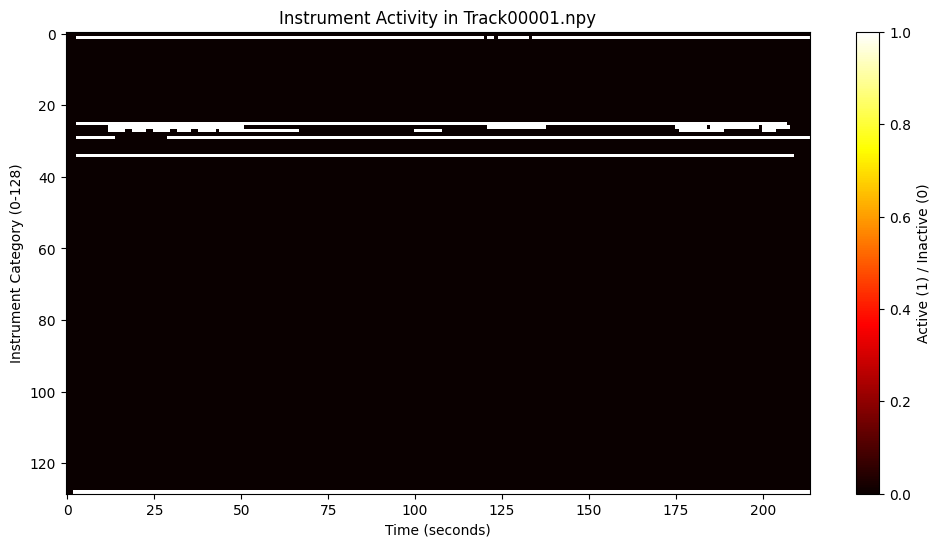

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the .npy file
npy_file = os.path.join("processed_tracks", "Track00003.npy")

# Load the .npy file
if os.path.exists(npy_file):
    data = np.load(npy_file)
    
    # Display basic information
    print(f"Shape of the matrix: {data.shape} (129 instruments x time in seconds)")
    
    # Show a summary of non-zero elements
    active_instruments, active_time_steps = np.where(data == 1)
    print(f"Total active time steps: {len(active_time_steps)}")
    print(f"Instruments with active time: {set(active_instruments)}")
    
    # Plot a heatmap of active instruments over time
    plt.figure(figsize=(12, 6))
    plt.imshow(data, aspect='auto', cmap='hot', interpolation='nearest')
    plt.xlabel("Time (seconds)")
    plt.ylabel("Instrument Category (0-128)")
    plt.title("Instrument Activity in Track00001.npy")
    plt.colorbar(label="Active (1) / Inactive (0)")
    plt.show()
else:
    print(f"File {npy_file} not found. Please ensure the processing script has been run.")